In [ ]:
! pip install kneed

#### import libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

#### Reading data

In [16]:
data = np.genfromtxt('data.csv', delimiter=',')
#drop first two columns ((id),(label))
data = data[:, 2:]


#### Kmeans implmentaion

In [17]:
class kmean :
        # random guess of intiall location of centroids
        def init_centroids(self, points, k):
            centroids = points.copy()
            np.random.shuffle(centroids)
            return centroids[:k] # take the frist k rows after shuffleing
        
        def assign_points_to_clusters(self, data, centroids):
            # calc eqlidian distances between each data point and  each centroid
            # sqrt((d1-c1)^2 + ......)

            distances = np.sqrt(((data - centroids[:, np.newaxis]) ** 2).sum(axis=2))
            # shape of disance is n , k    where  n : number of data points
            #                                     k : number of centroids 
            # datapoint 1  : 2osdha k distances (distance bet datapoint 1 and centroid 1) ( '' '' ' centroid 2)   
            # every data point (2odmha distance bnha w byn kol centriod)
            

            # Assign each data point to the cluster with the nearest centroid
            clusters = np.argmin(distances, axis=0) # cluster is 1D array of size n 
                                                    # bt2oli 3nd kol data point
                                        # the index of the centriod el 3ndo 22l distance m3ha
            return clusters
        
        def update_centroids(self, data, clusters, k):
            new_centroids = np.zeros((k, data.shape[1]))
            for i in range(k): # hlf 3la kol centroid ashof el points el 3ndo 
                               # hgeb el mean w assign l mean yeb2a el locattion bt3o el gded
                                # bhseb el mean f kol direction 3la heda
                # Update centroids by taking the mean of all data points in the cluster
                #  cluster : indcies of centriods
                cluster_points = data[clusters == i]
                if len(cluster_points) > 0:
                    new_centroids[i] = np.mean(cluster_points, axis=0)
                else: 
                    new_centroids[i] = data[np.random.randint(0, data.shape[0])]
            return new_centroids
        
        def k_means(self , data, k, max_iterations=200):
            # Initialize centroids
            best_sse = float('inf') # we need to minimuize it so intialize it to inf
            bestc = None            # best centriod
            bestclusters=None       # best clusters
            
            for i in range(1,21): # 3nd kol k hlf 20 mra 3shan ashof eh ashan intiallization lel centroids
                #1st step intiallise random locations to centroids
                centroids = self.init_centroids(data, k)

                for _ in range(max_iterations):# repeate 
                    # assign points to cluster  && then  move cluster (mean) 
                    clusters = self.assign_points_to_clusters(data, centroids)
                    new_centroids = self.update_centroids(data, clusters, k)

                    # Check for convergence
                    if np.all(centroids == new_centroids):
                        break

                    centroids = new_centroids
                    # to calculate error  , iterate on each centroid (ashof el distance) byno w byn el points el m3ah fel cluster
                    sse = np.sum([np.sum((data[clusters == j] - centroids[j])**2) for j in range(k)])
                if sse < best_sse: 
                        best_sse = sse
                        bestc = centroids
                        bestclusters = clusters
            clusters = bestclusters
            centroids =bestc
            return clusters, centroids

define random seed , kvalues

In [18]:
np.random.seed(42)
k_values = range(1,11)

trying diffrent values of k , print the result of (cluster assignment , final centroids)

In [19]:
for k in k_values:
    print(f"\nTesting K = {k}")
    km = kmean()
    clusters, final_centroids = km.k_means(data, k)
    print("Cluster Assignments:")
    print(clusters)
    print("Final Centroids:")
    print(final_centroids)


Testing K = 1
Cluster Assignments:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

### ELbow Method for choosing best K

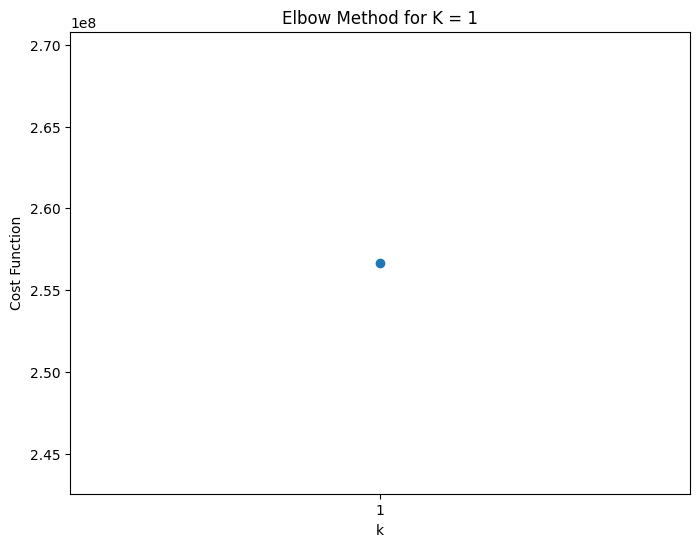

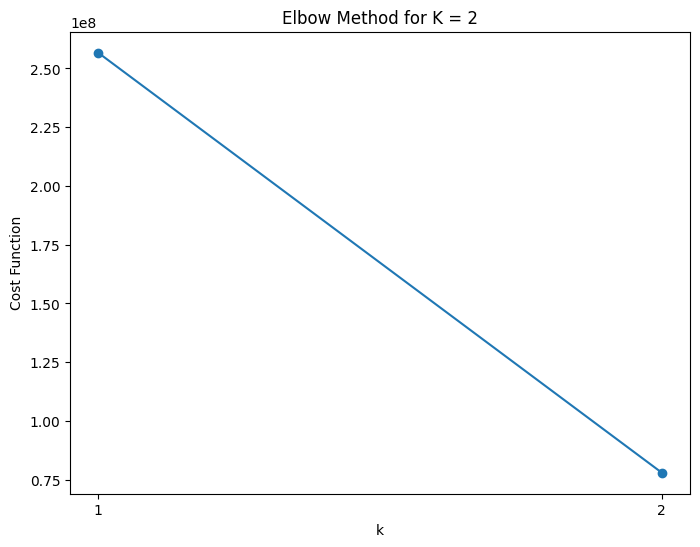

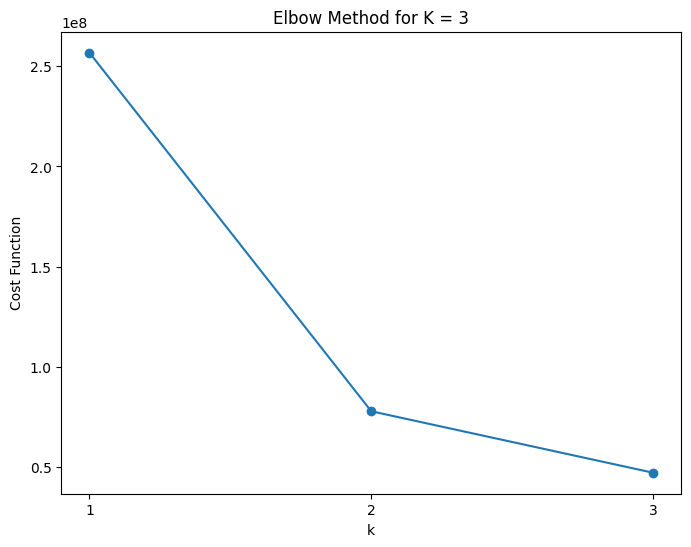

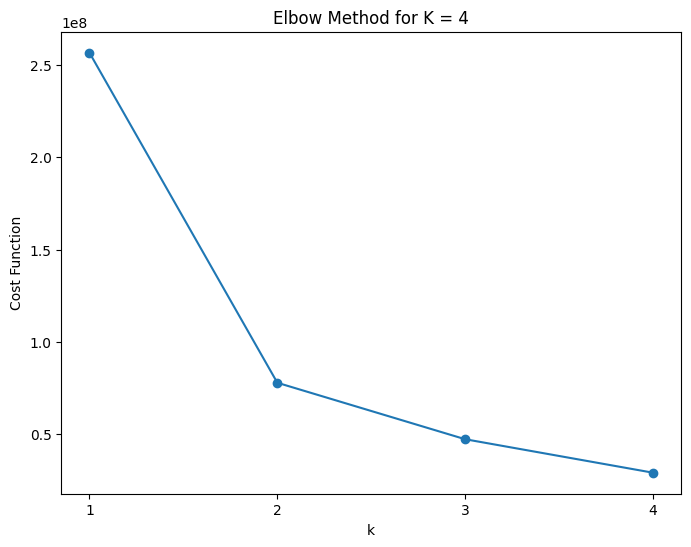

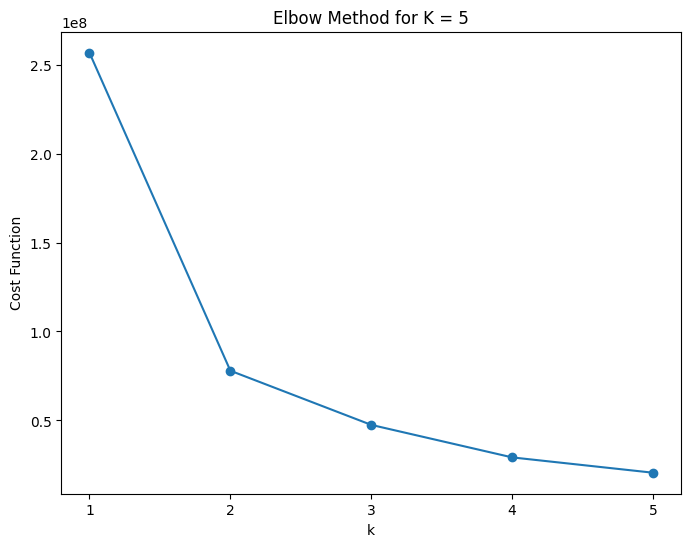

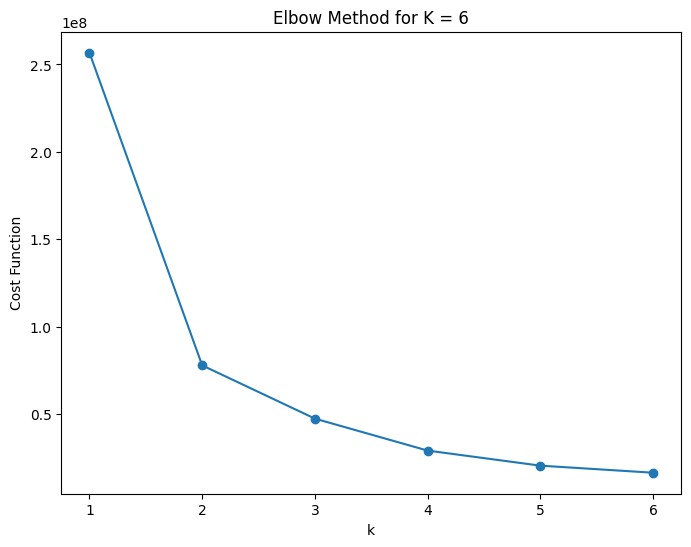

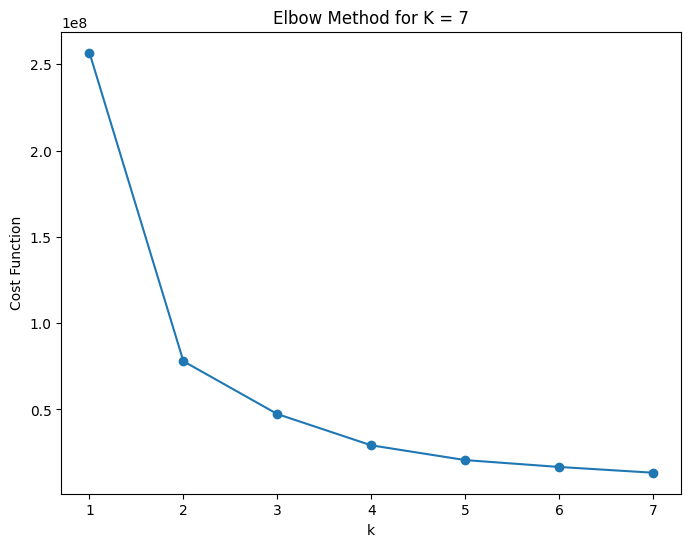

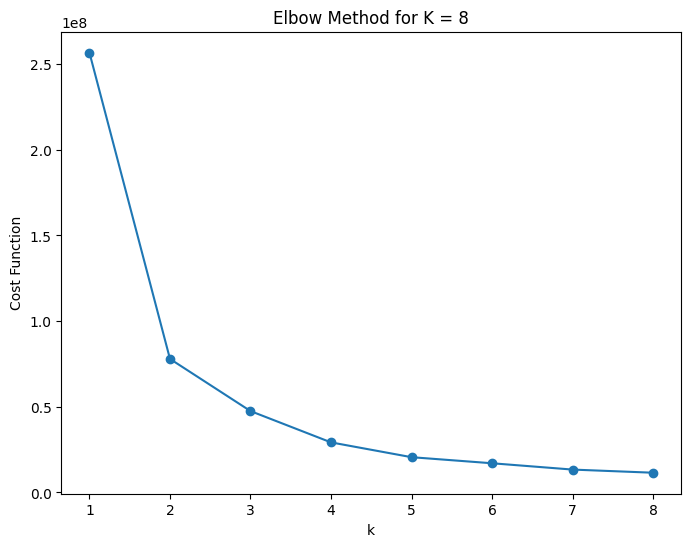

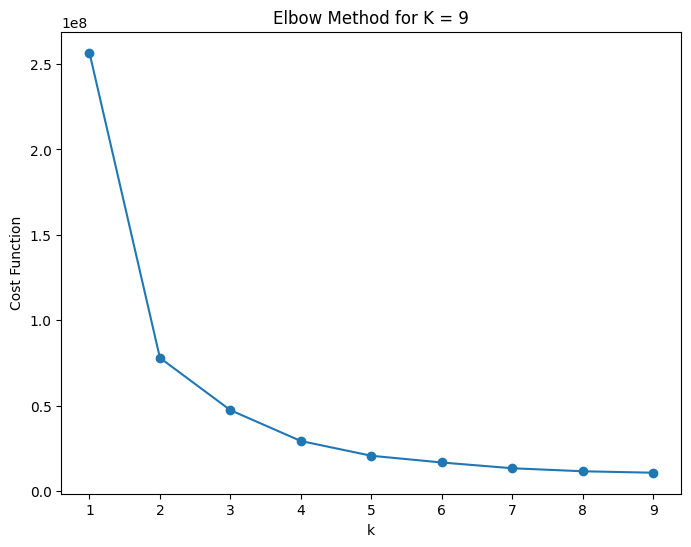

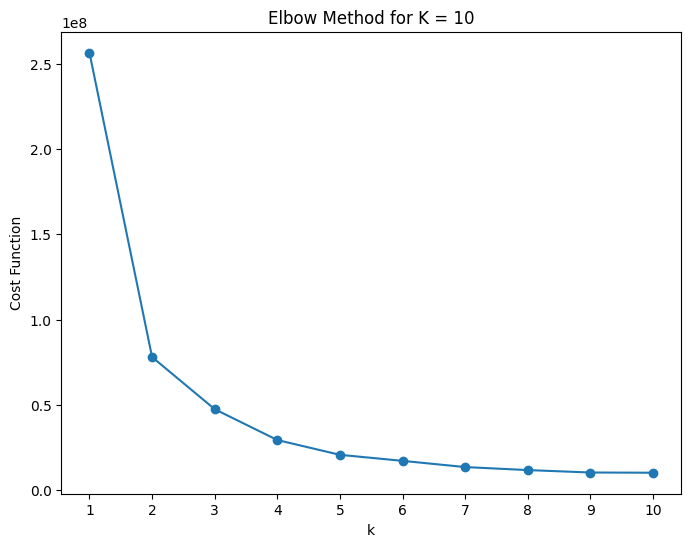

In [20]:
cost_fun_vals = []
k_m = kmean()
for k in k_values: # try diffrent k values , at each one calculate cost function
    cost_funs_imp = []
    for curr_k in range(1, k + 1): # if we have k (centroids) , 
        # itterate from fist centriod to last centroid (3shan 3yz a3ml plot 3nd kol k , el cost bkam) 
        #  so iterate     1 cluseter , 2 , 3 , 4 ....... k clusters

        # call k means on curr_k
        curr_clusters, curr_centroids = k_m.k_means(data, curr_k)
        cost = 0
        
        #calculate sse on this k mean 
        for i in range(curr_k):
            cluster_points = data[curr_clusters == i]
            centroid = curr_centroids[i]
            cost += np.sum((cluster_points - centroid) ** 2)
        
        # cost on 1 cluster  , 2 clusters , 3 clusters
        cost_funs_imp.append(cost)

    
    cost_fun_vals.append(cost_funs_imp)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, k + 1), cost_funs_imp, marker='o', linestyle='-')
    plt.xlabel('k')
    plt.ylabel('Cost Function')
    plt.title(f'Elbow Method for K = {k}')
    plt.xticks(np.arange(1, k + 1, 1)) # from 1 till k+1 inc each time by 1
    plt.show()



#### determine Elbow method using kneelocator (built in)

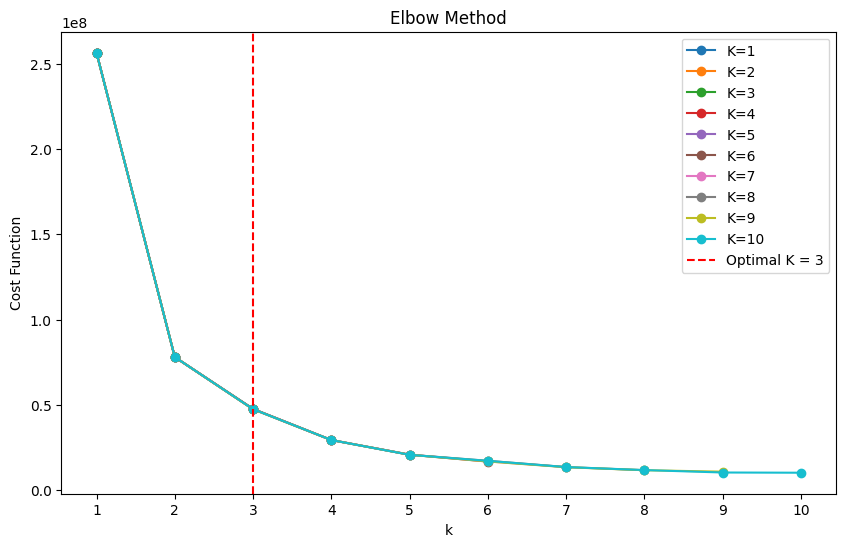

In [21]:
plt.figure(figsize=(10, 6))
for idx, wcss_imp in enumerate(cost_fun_vals):
    plt.plot(range(1, k_values[idx] + 1), wcss_imp, marker='o', linestyle='-', label=f'K={k_values[idx]}')

# Identifying the "elbow" point using the KneeLocator
knee = KneeLocator(range(1, max(k_values) + 1), cost_fun_vals[-1], curve='convex', direction='decreasing')
optimal_k = knee.elbow

# Adding a vertical line at the optimal k value
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')

plt.xlabel('k')
plt.ylabel('Cost Function')
plt.title('Elbow Method')
plt.xticks(np.arange(1, max(k_values) + 1, 1))
plt.legend()
plt.show()


In [22]:
print(f'The elbow point is  {optimal_k}')

The elbow point is  3


### implmenting pca

In [23]:
def pca(X, num_components):
    # normalize data to make all features have zero mean , and div by std to mkae feature scaling (because data have diffren scales)
    # subtract mean from each feature
    
    X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Calculate covariance matrix
    covariance_matrix = np.cov(X_scaled, rowvar=False)

    eigenval, eigenvec = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    #select most significant components that capture the most variance in the data.
    sorted_idx = np.argsort(eigenval)[::-1]
    sorted_eigenvals = eigenval[sorted_idx]
    sorted_eigenvecs = eigenvec[:, sorted_idx]

    # Select the top 'num_components' eigenvectors
    pcs = sorted_eigenvecs[:, :num_components]

    # Project the data onto the principal components
    projected_points = np.dot(X_scaled, pcs)

    return projected_points, pcs, sorted_eigenvals

#### try diffrent component then apply  kmeans


PCA with 2 components:

Results for 2 components:
Eigenvalues:
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]

Principal Components:
[[ 0.21890244 -0.23385713]
 [ 0.10372458 -0.05970609]
 [ 0.22753729 -0.21518136]
 [ 0.22099499 -0.23107671]
 [ 0.14258969  0.18611302]
 [ 0.23928535  0.15189161]
 [ 0.25840048  0.06016536]
 [ 0.26085376 -0.0347675 ]
 [ 0.13816696  0.19034877]
 [ 0.06436335  0.36657547]
 [ 0.20597878 -0.10555215]
 [ 0.01742803  0.08997968]
 [ 0.21132592 -0.08945723]
 [ 0.20286964 -0.15229263]
 [ 0.01453145  0.20443045]
 [ 0.17039345  0.2327159 ]
 [ 0.15358979  0.19720

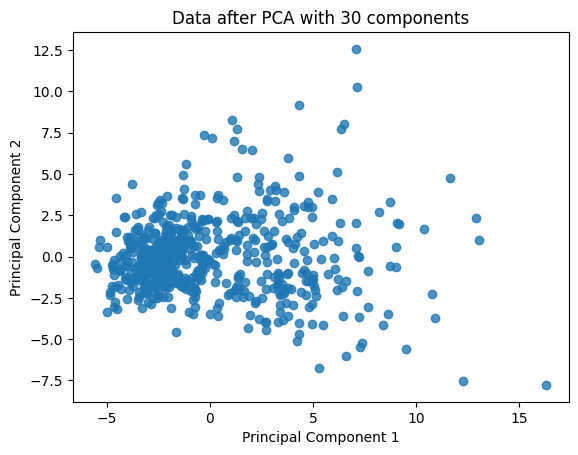

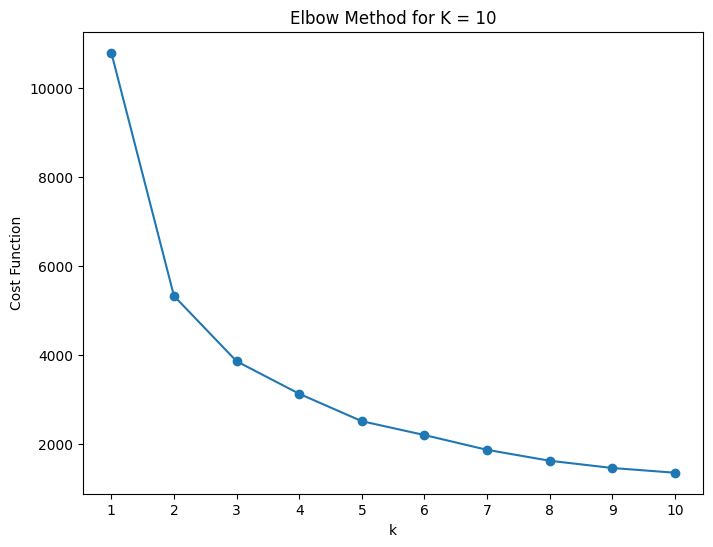

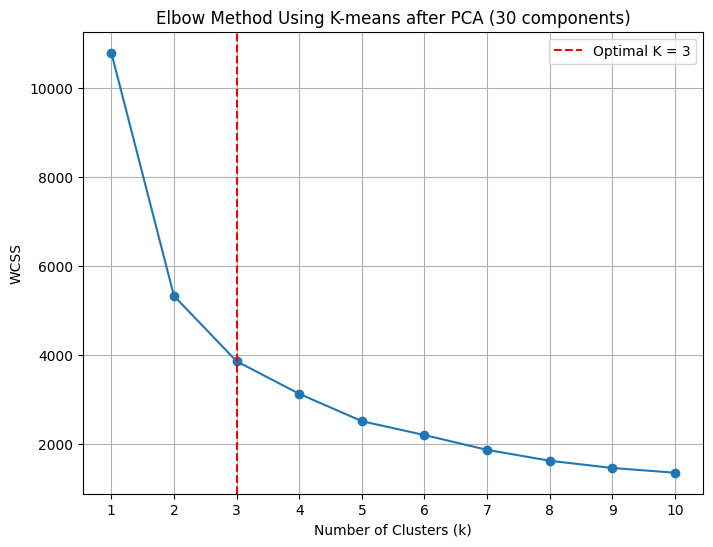

The optimal number of clusters (K) after PCA with 30 components is: 3


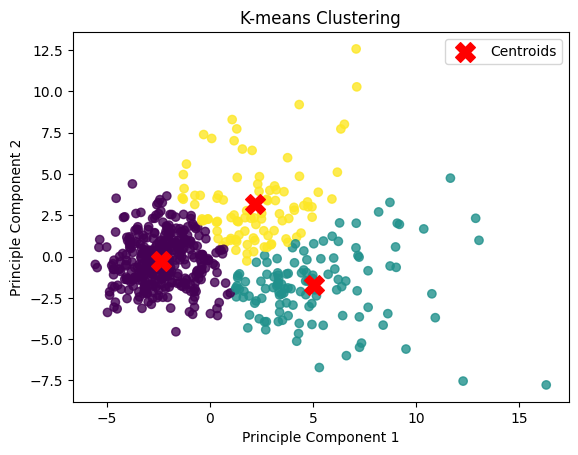

In [24]:
components =[2,5,10,15,20,25,30] 
arr= []
for n in components:
    print(f"\nPCA with {n} components:")
    projected_points, pcs, evals = pca(data, n)

    # Visualize or further analyze the results as needed
    # For instance, print eigenvalues and principal components for each iteration
    print(f"\nResults for {n} components:")
    print("Eigenvalues:")
    print(evals)
    print("\nPrincipal Components:")
    print(pcs)

projected_points, pcs, evals = pca(data, 2)

# Visualize projected data for the current number of components
plt.figure()
plt.scatter(projected_points[:, 0], projected_points[:, 1], alpha=0.8)
plt.title(f'Data after PCA with {n} components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Initialize a list to store the WCSS values for each K value
cost_fun_vals = []
k_m = kmean()
for k in k_values:
    cost_funs_imp_2 = []
    for curr_k in range(1, k + 1):
        curr_clusters, curr_centroids = k_m.k_means(projected_points, curr_k)
        cost = 0
        for i in range(curr_k):
            cluster_points = projected_points[curr_clusters == i]
            centroid = curr_centroids[i]
            cost += np.sum((cluster_points - centroid) ** 2)
        cost_funs_imp_2.append(cost)

cost_fun_vals.append(cost_funs_imp_2)
plt.figure(figsize=(8, 6))
plt.plot(range(1, k + 1), cost_funs_imp_2, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Cost Function')
plt.title(f'Elbow Method for K = {k}')
plt.xticks(np.arange(1, k + 1, 1))
plt.show()



# Plotting the elbow curve for all K values after PCA
plt.figure(figsize=(8, 6))
plt.plot(k_values, cost_funs_imp_2, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title(f'Elbow Method Using K-means after PCA ({n} components)')
plt.xticks(k_values)
plt.grid(True)

# Identifying the optimal K using KneeLocator
kneedle = KneeLocator(k_values, cost_funs_imp_2, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

# Marking the optimal K on the plot
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()

print(f"The optimal number of clusters (K) after PCA with {n} components is: {optimal_k}")


curr_clusters, curr_centroids = k_m.k_means(projected_points, optimal_k)

plt.scatter(projected_points[:, 0], projected_points[:, 1], c=curr_clusters, cmap='viridis', alpha=0.8)
plt.scatter(curr_centroids[:, 0], curr_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.show()

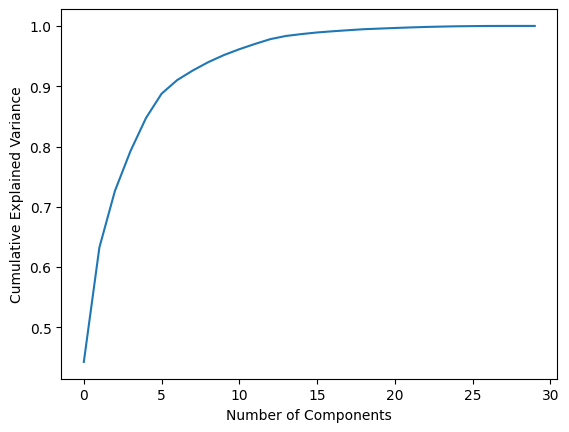

In [25]:
projected_points, pcs, evals = pca(data, 2)  
# PCA with 2 principle components
variance_ratio = evals / np.sum(evals)

cumulative_var_ratio = np.cumsum(variance_ratio)
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Comparing Between 2 Experiments

In [26]:
for k in k_values:
    print(f"\nTesting K = {k}")
    print(f"K = {k}: WCSS (Exp1) = {cost_funs_imp[k-1]}")

    print(f"K = {k}: WCSS (Exp2) = {cost_funs_imp_2[k-1]}")


Testing K = 1
K = 1: WCSS (Exp1) = 256677243.9542025
K = 1: WCSS (Exp2) = 10795.615546121198

Testing K = 2
K = 2: WCSS (Exp1) = 77943099.87829885
K = 2: WCSS (Exp2) = 5332.555574203135

Testing K = 3
K = 3: WCSS (Exp1) = 47336610.42199056
K = 3: WCSS (Exp2) = 3864.5452840073685

Testing K = 4
K = 4: WCSS (Exp1) = 29226541.651979793
K = 4: WCSS (Exp2) = 3133.6178606914827

Testing K = 5
K = 5: WCSS (Exp1) = 20539877.622102875
K = 5: WCSS (Exp2) = 2518.165012005964

Testing K = 6
K = 6: WCSS (Exp1) = 17001909.11496217
K = 6: WCSS (Exp2) = 2206.5456043904655

Testing K = 7
K = 7: WCSS (Exp1) = 13353989.51969086
K = 7: WCSS (Exp2) = 1874.4254576445924

Testing K = 8
K = 8: WCSS (Exp1) = 11583636.65778451
K = 8: WCSS (Exp2) = 1629.51894681743

Testing K = 9
K = 9: WCSS (Exp1) = 10162067.835855717
K = 9: WCSS (Exp2) = 1466.580283692125

Testing K = 10
K = 10: WCSS (Exp1) = 10034588.591932613
K = 10: WCSS (Exp2) = 1360.485254265464
